In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("C:/Users/sesa777393/Desktop/tareas/PIA_MIN_DAT/Data Cleaning/dataset_clean.csv")

In [ ]:
features = ['usability', 'views', 'downloads']
data_to_cluster = df[features].copy() 


In [ ]:
data_to_cluster.dropna(inplace=True)  
if data_to_cluster.shape[0] < df.shape[0]:
    print(f"Warning: Dropped {df.shape[0] - data_to_cluster.shape[0]} rows due to missing values.")


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)


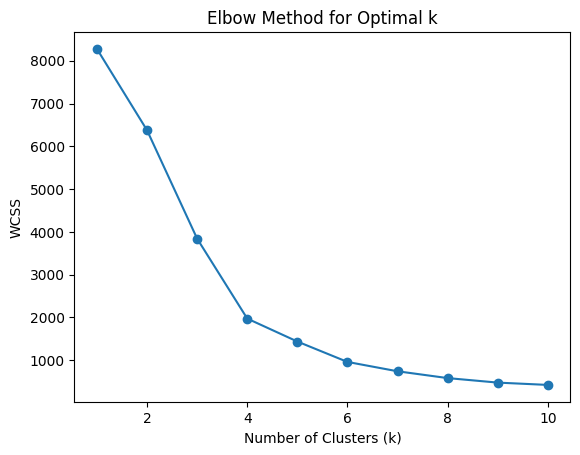

In [7]:
def elbow_method(scaled_data, max_k=10):
    """ """
    wcss = []  
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)  
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)  

    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

elbow_method(scaled_data)

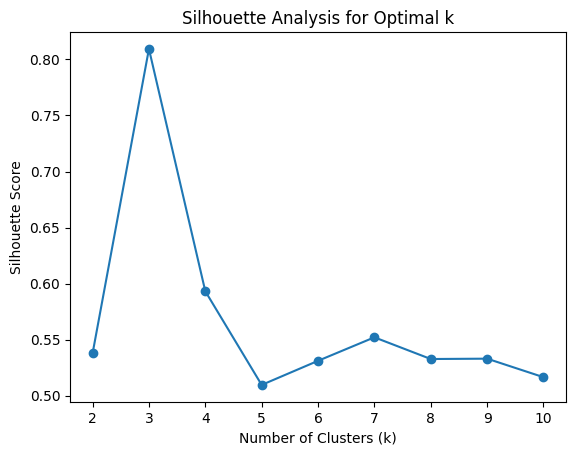

In [ ]:
def silhouette_analysis(scaled_data, max_k=10):
    """ """

    silhouette_scores = []
    for i in range(2, max_k + 1): 
        kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)  
        kmeans.fit(scaled_data)
        silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Analysis for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()

silhouette_analysis(scaled_data)

chosen_k = 3 
kmeans = KMeans(n_clusters=chosen_k, n_init='auto', random_state=42) 
kmeans.fit(scaled_data)
df['cluster'] = kmeans.labels_ 


In [10]:
cluster_summary = df.groupby('cluster')[features].mean()
print("\n--- Cluster Summary ---")
print(cluster_summary)


--- Cluster Summary ---
         usability         views      downloads
cluster                                        
0         7.537256  2.074642e+04    2614.135006
1         8.476596  5.820434e+05   91805.914894
2         8.500000  8.305532e+06  287019.000000


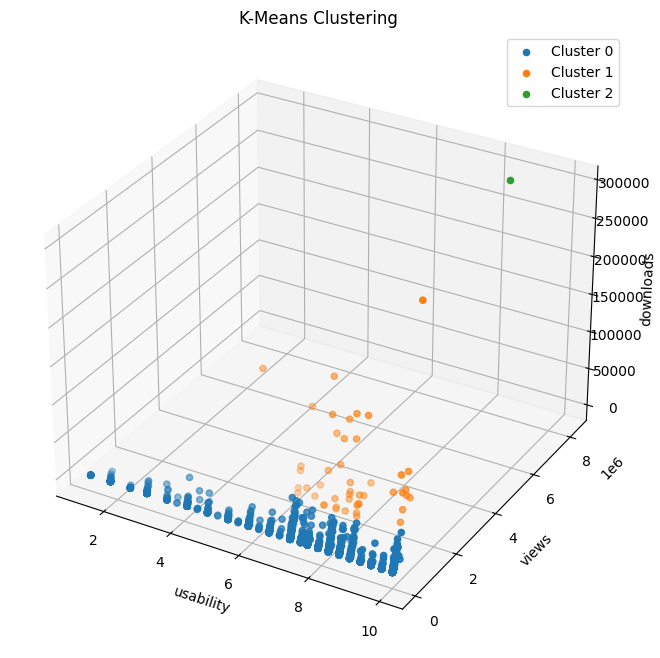

In [11]:
if len(features) == 2:
    plt.figure(figsize=(8, 6))
    for i in range(chosen_k):
        plt.scatter(df[df['cluster'] == i][features[0]], df[df['cluster'] == i][features[1]], label=f'Cluster {i}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

elif len(features) == 3:
    from mpl_toolkits.mplot3d import Axes3D  

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(chosen_k):
        ax.scatter(df[df['cluster'] == i][features[0]], df[df['cluster'] == i][features[1]], df[df['cluster'] == i][features[2]], label=f'Cluster {i}')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.set_title('K-Means Clustering')
    ax.legend()
    plt.show()

else:
    print("Cannot visualize clusters effectively with more than 3 features.")

In [12]:
if 'medal' in df.columns:
    print("\n--- Medal Distribution within Clusters ---")
    print(pd.crosstab(df['cluster'], df['medal']))


--- Medal Distribution within Clusters ---
medal     Bronze   Gold   Silver  No_Medal
cluster                                   
0           1084    133      251      1243
1              0     47        0         0
2              0      1        0         0
